# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Importing base libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats

# Importing libraries needed for API requests
import json
import requests
from config import api_key

# Importing random library for randomizing longitudes
import random

# Importing library which returns the nearest city for given (latitude, longitude)
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/city_weather.csv"

## Generate Cities List

In [2]:
# Range of latitudes and longitudes acordinf to geographic coordinate system.
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty lists to store the data for each field
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : yellowknife
Processing Record 2 of Set 1 : aplahoue
Processing Record 3 of Set 1 : okhotsk
Processing Record 4 of Set 1 : klaksvik
Processing Record 5 of Set 1 : sao felix do xingu
Processing Record 6 of Set 1 : cape town
Processing Record 7 of Set 1 : port lincoln
Processing Record 8 of Set 1 : atuona
City not found. Skipping...
Processing Record 9 of Set 1 : kodiak
Processing Record 10 of Set 1 : maumere
Processing Record 11 of Set 1 : sechura
Processing Record 12 of Set 1 : ponta do sol
Processing Record 13 of Set 1 : banjar
City not found. Skipping...
Processing Record 14 of Set 1 : honiara
Processing Record 15 of Set 1 : seredeyskiy
City not found. Skipping...
Processing Record 16 of Set 1 : la ronge
Processing Record 17 of Set 1 : busselton
Processing Record 18 of Set 1 : albany
Processing Record 19 of Set 1 : port hedland
City not found. Skipping...
Processing Record 20 of Set 1 : carballo
Pro

Processing Record 34 of Set 4 : tevaitoa
Processing Record 35 of Set 4 : ternate
City not found. Skipping...
Processing Record 36 of Set 4 : suntar
Processing Record 37 of Set 4 : kapit
Processing Record 38 of Set 4 : bayan
Processing Record 39 of Set 4 : sili
Processing Record 40 of Set 4 : hithadhoo
Processing Record 41 of Set 4 : shingu
Processing Record 42 of Set 4 : cherskiy
Processing Record 43 of Set 4 : maceio
Processing Record 44 of Set 4 : shenjiamen
Processing Record 45 of Set 4 : bilma
Processing Record 46 of Set 4 : vaini
Processing Record 47 of Set 4 : skjervoy
Processing Record 48 of Set 4 : santa cruz
Processing Record 49 of Set 4 : biu
Processing Record 50 of Set 4 : yeppoon
Processing Record 0 of Set 5 : domna
Processing Record 1 of Set 5 : piacabucu
City not found. Skipping...
Processing Record 2 of Set 5 : porbandar
Processing Record 3 of Set 5 : carnduff
Processing Record 4 of Set 5 : trairi
Processing Record 5 of Set 5 : muzhi
Processing Record 6 of Set 5 : haimen

Processing Record 16 of Set 8 : vestmanna
Processing Record 17 of Set 8 : aniche
Processing Record 18 of Set 8 : poum
Processing Record 19 of Set 8 : roebourne
Processing Record 20 of Set 8 : tucuma
Processing Record 21 of Set 8 : atagay
Processing Record 22 of Set 8 : saint-joseph
Processing Record 23 of Set 8 : hambantota
Processing Record 24 of Set 8 : lamar
Processing Record 25 of Set 8 : robore
Processing Record 26 of Set 8 : hammerfest
Processing Record 27 of Set 8 : mocuba
Processing Record 28 of Set 8 : vilhena
Processing Record 29 of Set 8 : mitu
Processing Record 30 of Set 8 : nantucket
City not found. Skipping...
Processing Record 31 of Set 8 : gorontalo
Processing Record 32 of Set 8 : lanas
Processing Record 33 of Set 8 : pacific grove
Processing Record 34 of Set 8 : caravelas
Processing Record 35 of Set 8 : necochea
Processing Record 36 of Set 8 : nuuk
Processing Record 37 of Set 8 : pelym
Processing Record 38 of Set 8 : selfoss
Processing Record 39 of Set 8 : yaan
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,20,CA,1616149752,85,62.4560,-114.3525,12.20,9.22
1,Aplahoué,100,BJ,1616150073,47,6.9333,1.6833,91.71,5.37
2,Okhotsk,0,RU,1616149948,68,59.3833,143.3000,7.81,13.60
3,Klaksvík,73,FO,1616149762,93,62.2266,-6.5890,46.40,9.22
4,São Félix do Xingu,98,BR,1616150040,97,-6.6447,-51.9950,71.76,2.62
...,...,...,...,...,...,...,...,...,...
542,Lalibela,0,ET,1616150223,16,12.0333,39.0333,80.24,3.69
543,Churapcha,100,RU,1616150223,95,62.0025,132.4325,10.49,7.29
544,Black River,20,JM,1616150223,78,18.0264,-77.8487,73.40,3.44
545,Guerrero Negro,35,MX,1616149755,85,27.9769,-114.0611,55.92,9.08


In [7]:
# Save city data into a csv file
weather_dict.to_csv("output_data/city_weather.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

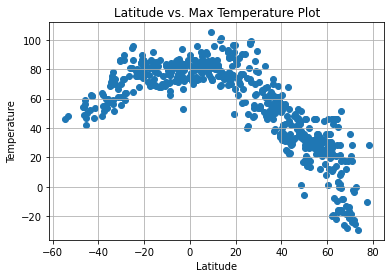

In [27]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Max Temp'], marker = "o")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title('Latitude vs. Max Temperature Plot')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("output_data/Latitude vs. Max Temperature Plot.png")
# Display plot
plt.show()

Latitude vs. Temperature Plot show the relationship between latitude and temperature. Which means as you closer to equator line(latitude 0) the temperature gets hotter.

## Latitude vs. Humidity Plot

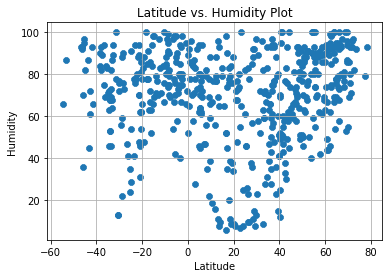

In [28]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Humidity'], marker = '8')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Latitude vs. Humidity Plot')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("output_data/Latitude vs. Humidity Plot.png")
# Display plot
plt.show()

Latitude vs. Cloudiness Plot show the relationship between latitude and humidity. It shows that the humidity is more consistent with higher latitudes.

## Latitude vs. Cloudiness Plot

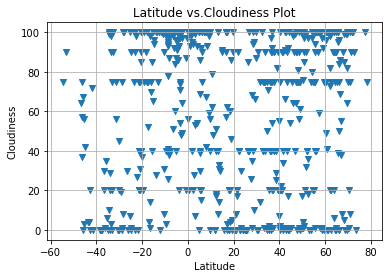

In [29]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Cloudiness'], marker = "v")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude vs.Cloudiness Plot')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("output_data/Latitude vs. Cloudiness Plot.png")
# Display plot
plt.show()

Latitude vs. Cloudiness Plot show a radom relationship between latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

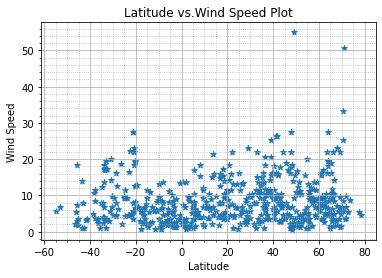

In [30]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Wind Speed'], marker = "*")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Latitude vs.Wind Speed Plot')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.minorticks_on()
plt.savefig("output_data/Latitude vs. Wind Speed Plot.png")
# Display plot
plt.show()

Latitude vs. Wind Speed Plot show the relationship between latitude and wind speed. As Farther away from the equator (latitude 0), thewind speeds will be generally greater.

## Linear Regression

In [14]:
# Calculate the correlation coefficient and linear regression model 
# Get values
x_values = weather_dict["Lat"]
y_values = weather_dict["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


0      28.977434
1      63.186547
2      30.870612
3      29.118774
4      71.552339
         ...    
542    60.044292
543    29.256849
544    56.351773
545    50.220987
546    62.436904
Name: Lat, Length: 547, dtype: float64


In [15]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.62x +67.46


The r-value is: 0.5134266830208045


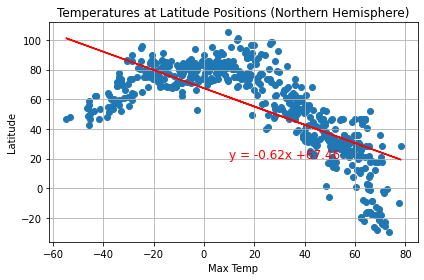

In [31]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
# Annotate linear regression
plt.annotate(line_eq,(10,20),fontsize=12,color="red")

# Stetic 
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.tight_layout()
plt.savefig("output_data/Temperatures at Latitude Positions (Northern Hemisphere).png")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
mask = weather_dict['Lat'] > 0
northern_hemisphere = weather_dict[mask]
southern_hemisphere = weather_dict[~mask]

In [18]:
# Define plotting function so we can just cahnge the values un X axis and Y axis.

def plotLinearRegression(xdata,ydata,xlbl,ylbl):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,(10,20),fontsize=12,color="red")
    plt.grid()
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

The r-squared is: -0.8782134625818161


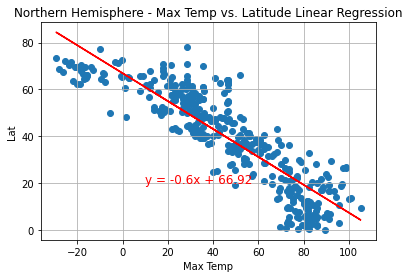

In [32]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Max Temp"
ylbl = "Lat"
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plotLinearRegression(northern_hemisphere[xlbl],northern_hemisphere[ylbl],xlbl,ylbl)

Northern Hemisphere - Max Temp vs. Latitude Linear Regression show that there is strong negative linear relationship betwen Max Temp and Latitude. When one variable increases while the other variable decreases(temp), a negative linear relationship exists.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6386049533893635


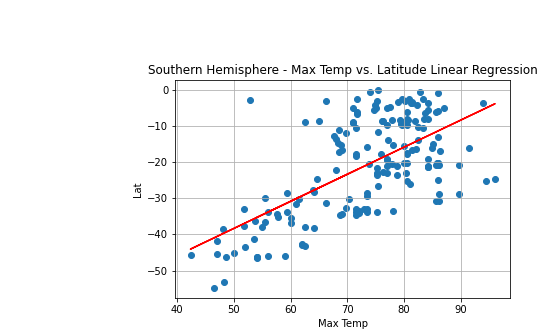

In [20]:
xlbl = "Max Temp"
ylbl = "Lat"
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plotLinearRegression(southern_hemisphere[xlbl],southern_hemisphere[ylbl],xlbl,ylbl)

In the case of Southern Hemisphere - Max Temp vs. Latitude Linear Regression , I found that there is a positive linear relationship, because both variables increase or decrease concurrently and at a constant rate, this case (Temp vs. Latitude).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31830304803003423


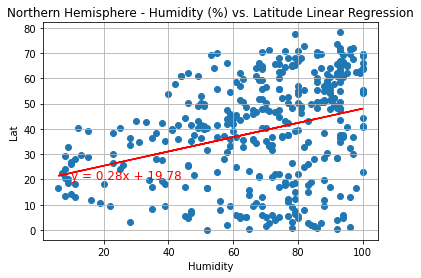

In [21]:
xlbl = "Humidity"
ylbl = "Lat"
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plotLinearRegression(northern_hemisphere[xlbl],northern_hemisphere[ylbl],xlbl,ylbl)

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression show us that meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12185603713890863


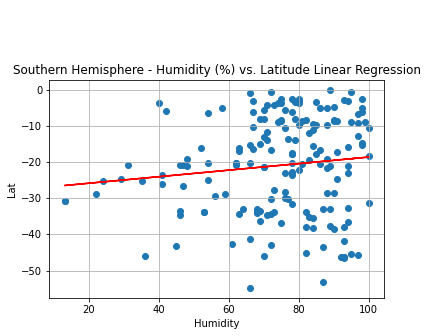

In [22]:
xlbl = "Humidity"
ylbl = "Lat"
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plotLinearRegression(southern_hemisphere[xlbl],southern_hemisphere[ylbl],xlbl,ylbl)

For Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression there does not seem to be a very strong correlation a slight negative correlation in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1146248909750858


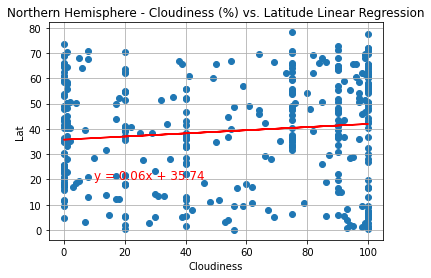

In [23]:
xlbl = "Cloudiness"
ylbl = "Lat"
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plotLinearRegression(northern_hemisphere[xlbl],northern_hemisphere[ylbl],xlbl,ylbl)

For the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression There does not seem to be much correlation . However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.41735210381901516


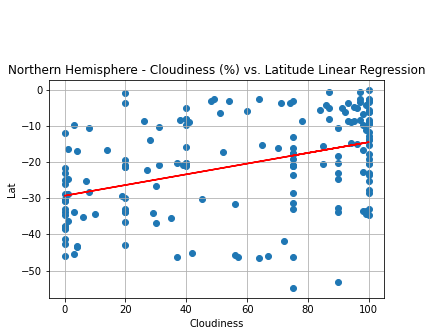

In [24]:
xlbl = "Cloudiness"
ylbl = "Lat"
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plotLinearRegression(southern_hemisphere[xlbl],southern_hemisphere[ylbl],xlbl,ylbl)

For the Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression there is a strong negative correlation in the Southern Hemisphere. it shows that the further you are from the equator (latitude 0) the less cloudy it is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12640025002660657


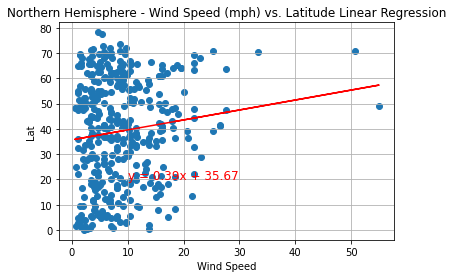

In [25]:
xlbl = "Wind Speed"
ylbl = "Lat"
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plotLinearRegression(northern_hemisphere[xlbl],northern_hemisphere[ylbl],xlbl,ylbl)

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression  shows a much lower correlation. There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.15332698627889435


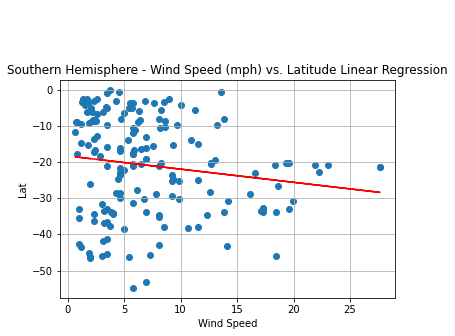

In [26]:
xlbl = "Wind Speed"
ylbl = "Lat"
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plotLinearRegression(southern_hemisphere[xlbl],southern_hemisphere[ylbl],xlbl,ylbl)

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression there is negative linear relationship. but not as strong. 